# Electical Circuits

In [1]:
from scipy.optimize import curve_fit
import scipy
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, exp, tan, log,log10,min,max
from mplcursors import cursor  # separate package must be installed

from bookfuncs.simuParams import  SimuParam
from bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot1DSparametricUwrap,plot1DSparametricdB



<function matplotlib.pyplot.show(close=None, block=None)>

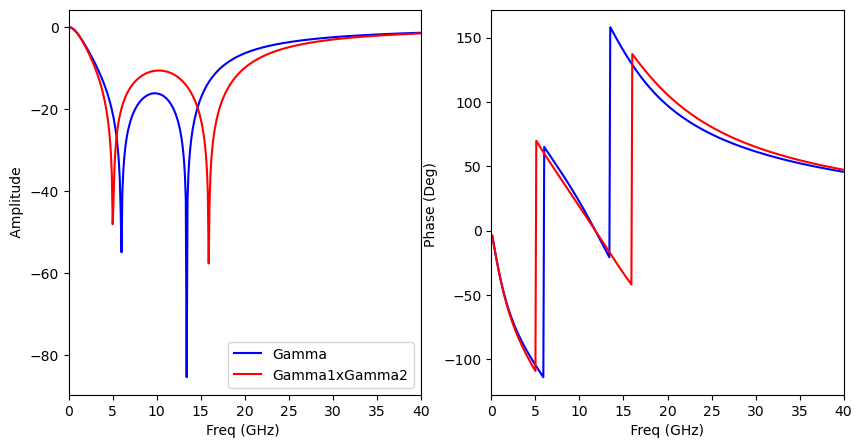

In [2]:
def addElementCircuit(type,Z1,Z2):
    if type=='Series':
        Zeq=Z1+Z2
    if type=='Shunt':
        Zeq=(Z1*Z2)/(Z1+Z2)
    return Zeq

def createRLC(freq,type,R,L,C):
    omega=2*pi*freq
    if type=='Series':
        Z=R+1j*omega*L+1/(1j*omega*C)
    if type=='Shunt':
        Zc=1/(1j*omega*C)
        ZLind=1j*omega*L
        Z=addElementCircuit(type,Zc,ZLind)
        Z=addElementCircuit(type,Z,R)
    return Z

def gammaFromZ(Z0,Zeq):
    gamma=(Zeq-Z0)/(Zeq+Z0)
    return gamma

f=np.arange(0.1,40,0.1)*1e9
omega=2*pi*f
R1=50
R2=50
L1=1e-9
L2=1e-9
C1=1e-12
C2=0.1e-12
Z0=50
Z1=createRLC(f,'Series',R1,L1,C1)
Z2=createRLC(f,'Series',R2,L2,C2)
Zeq=addElementCircuit('Shunt',Z1,Z2)

Gamma=gammaFromZ(Z0,Zeq)
Gamma1=gammaFromZ(Z0,Z1)
Gamma2=gammaFromZ(Z0,Z2)

Gamma12=Gamma2*Gamma1


fig2,ax=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametricdB(ax,f,[0,40],(0,Gamma,'b','-'),
                          (0,Gamma12,'r','-'))
ax[0].legend(['Gamma','Gamma1xGamma2'])
cursor(hover=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

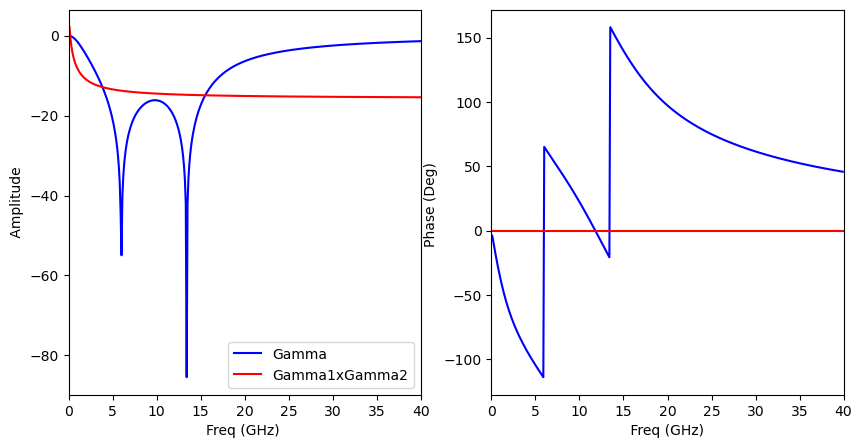

In [13]:
from bookfuncs.python.rationalfit import ratfit,ratfunctval


omegaf=2*pi*f
opt_param, covar_param =ratfit(omegaf,Gamma,int(2),int(2),full=True)
fitGamma=ratfunctval(omegaf,opt_param)
GammadB=20*log10(abs(Gamma))



fig2,ax=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametricdB(ax,f,[0,40],(0,Gamma,'b','-'),
                           (0,fitGamma,'r','-'))
ax[0].legend(['Gamma','Gamma1xGamma2'])
cursor(hover=True)
plt.show


In [9]:

fitGamma.shape


(399,)